Resources for basic data analysis using python, and conducting a linear regression. Will be using a diabetes dataset.

In [10]:
import numpy as np  # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis

import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization
%matplotlib inline


# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
#read csv dataset

pima = pd.read_csv("diabetes.csv") # load and reads the csv file
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
# finds the number of columns in the dataset
total_cols=len(pima.axes[1])
print("Number of Columns: "+str(total_cols))

Number of Columns: 9


In [13]:
#first 10 rows
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Outcomes here represents whether someone has diabetes (1) or not (0).

In [14]:
#number of rows in dataset

# finds the number of rows in the dataset
total_rows=len(pima.axes[0])
print("Number of Rows: "+str(total_rows))

Number of Rows: 768


In [15]:
print('The dimension of the DataFrame is: ', pima.ndim)


The dimension of the DataFrame is:  2


In [17]:
#size of the dataset (how many elements)

pima.size

6912

In [18]:
#The info() function is used to print a concise summary of a DataFrame.
#This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
#functions that return a boolean value indicating whether the passed in argument value is in fact missing data.
# this is an example of chaining methods

pima.isnull().values.any()

False

In [20]:
#it can also output if there is any missing values each of the columns

pima.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Now let's do a summary of the statistics! 

In [29]:
pima.iloc[:,8:]

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [21]:
#excludes the outcome column 
pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Slay <3

From the results we can make out a few insights:
 The pregnancy numbers appear to be normally distributed whereas the others seem to be rightly skewed. (The mean and std deviation of pregnancies are more or less the same as opposed to the others). 
 Highest glucose levels is 199, pregnancies 17 and BMI 67. 

Now to the fun part. 

## **Data Visualization** 

Plotting a distribution plot for variable 'Blood Pressure'. 

displot() function which is used to visualize a distribution of the univariate variable. This function uses matplotlib to plot a histogram and fit a kernel density estimate (KDE).

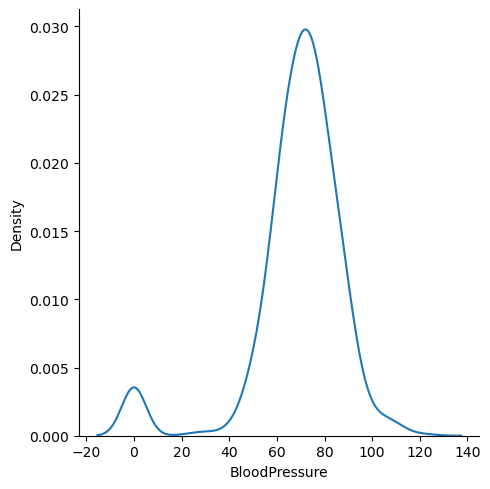

In [22]:
sns.displot(pima['BloodPressure'], kind='kde') 
plt.show()

**What is the BMI of the person having the highest glucose?**

 Max() method finds the highest value.

In [23]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

The person with the highest glucose value (661) has a bmi of 42.9 

**Finding Measures of Central Tendency (the mean,median, and mode) ** 

In [24]:
# mean 
m1 = pima['BMI'].mean() 
print(m1) 

# median 
m2 = pima['BMI'].median() 
print(m2)

# mode  
m3 = pima['BMI'].mode()[0] 
print(m3)

31.992578124999998
32.0
32.0


Studying the correlation between glucose and insulin using a Scatter Plot.

A scatter plot is a set of points plotted on horizontal and vertical axes. The scatter plot can be used to study the correlation between the two variables. One can also detect the extreme data points using a scatter plot.

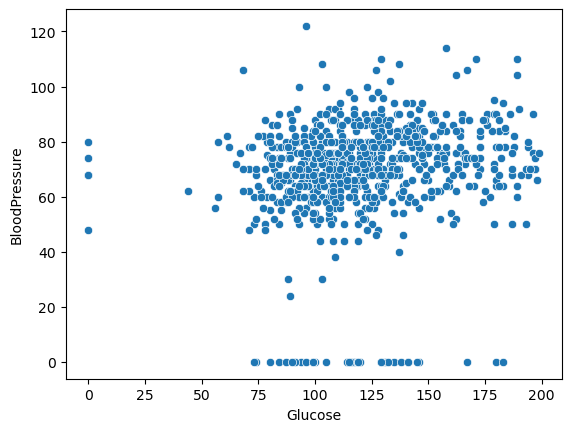

In [50]:
sns.scatterplot(x='Glucose',y='BloodPressure',data=pima)
plt.show()

Now, to do a linear regression. 

Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, meaning that the change in the dependent variable is directly proportional to the change in the independent variable(s). The goal of linear regression is to find the best-fit line that minimizes the distance between the observed data points and the predicted values on the line. This line can then be used to make predictions or understand the impact of the independent variable(s) on the dependent variable.

Thus, linear regressions can only be done with numerical variables (for example, glucose levels or skin thickness). 

In [51]:
import statsmodels.api as sm

Here, we conduct a linear regression using glucose levels as the independent variable (x) and insulin as the dependent variable (y). 

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     18.26
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           2.17e-05
Time:                        16:05:01   Log-Likelihood:                -3355.8
No. Observations:                 768   AIC:                             6716.
Df Residuals:                     766   BIC:                             6725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9377      2.703     21.433      0.0

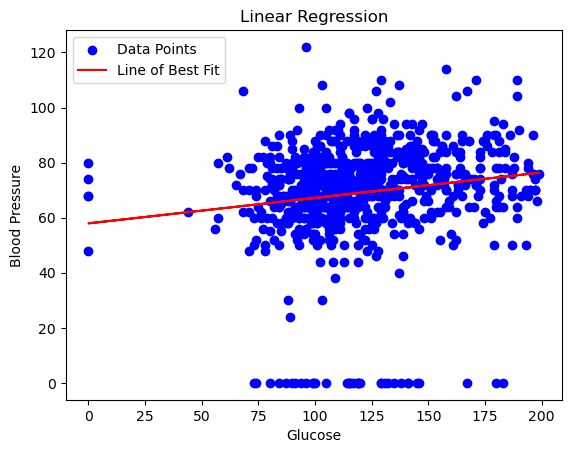

In [58]:

X = pima['Glucose']
y = pima['BloodPressure']

# Add a constant column for the intercept term
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Make predictions
y_pred = results.predict(X)

# Access the coefficients
print("Coefficients: ", results.params)

# Plot the data points and the line of best fit
plt.scatter(X['Glucose'], y, color='blue', label='Data Points')
plt.plot(X['Glucose'], y_pred, color='red', label='Line of Best Fit')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Linear Regression')
plt.legend()
plt.show()

## What about a logistic regression?

Use a logistic regression when exploring 
For the diabetes dataset, you would use logistic regression because the values are binary (they are not just 0 and 1). More to come on this in a future blog post!